# Overview Exercises

## Q1

 Question: Has the network latency gone up since we switched internet service providers?

Hypothesis translation: Is there a relationship between network latency and internet service providers?

H_{0}: There is no relationship between network latency and internet service providers.

H_{A}: There is a relationship between network latency and internet service providers.

There is continuous (network_latency, numeric) and discrete (is_new_isp, boolean) data. 

boolean x numeric: comparison of means (t-test) across the 2 groups

True positive will reject our H_{0} and H_{A} would be true. Our data would show there is a relationship between network latency and internet service providers, and, in reality, we know there is a relationship between latency and internet service providers.

True negative will fail to reject our H_{0} and H_{0} would be true. Our data would show there is no relationship between network latency and internet service providers, and, in reality, we know there is no relationship between latency and internet service providers.

False positive (type I) will reject our H_{0} but H_{0} would be true. This means that our data would show that there is a relationship between network latency and internet service providers, but, in reality, we know that there is not a relationship between latency and internet service providers.

False negative (type II) will fail to reject our H_{0} but H_{A} would be true. This means that our data would show that there is no relationship between network latency and internet service providers, but, in reality, we know that there is a relationship between latency and internet service providers.

## Q2

Question: Is the website redesign any good?

Hypothesis translation: Is there a relationship between website clicks and the website redesign?

There is continuous (website_clicks, numeric) and discrete (is_redesign, boolean) data.

boolean x numeric: comparison of means (t-test) across the 2 groups

True positive will reject our H_{0} and H_{A} would be true. Our data would show there is a relationship between website clicks and website redesign, and, in reality, we know there is a relationship between website clicks and website redesign.

True negative will fail to reject our H_{0} and H_{0} would be true. Our data would show there is no relationship between website clicks and website redesign, and, in reality, we know there is no relationship between website clicks and website redesign.

False positive (type I) will reject our H_{0} but H_{0} would be true. This means that our data would show that there is a relationship between website clicks and website redesign, but, in reality, we know that there is not a relationship between website clicks and website redesign.

False negative (type II) will fail to reject our H_{0} but H_{A} would be true. This means that our data would show that there is no relationship between website clicks and website redesign, but, in reality, we know that there is a relationship between website clicks and website redesign.

## Q3

Question: Is our television ad driving more sales?

Hypothesis translation: Is there a relationship between sales and using our television ad?

There is continuous (sales, numeric) and discrete (ad_used, boolean) data.

boolean x numeric: comparison of means (t-test) across the 2 groups

True positive will reject our H_{0} and H_{A} would be true. Our data would show there is a relationship between sales and using our television ad, and, in reality, we know there is a relationship between sales and using our television ad.

True negative will fail to reject our H_{0} and H_{0} would be true. Our data would show there is no relationship between sales and using our television ad, and, in reality, we know there is no relationship between sales and using our television ad.

False positive (type I) will reject our H_{0} but H_{0} would be true. This means that our data would show that there is a relationship between website sales and using our television ad, but, in reality, we know that there is not a relationship between sales and using our television ad.

False negative (type II) will fail to reject our H_{0} but H_{A} would be true. This means that our data would show that there is no relationship between sales and using our television ad, but, in reality, we know that there is a relationship between sales and using our television ad.

# T-Test Exercises

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import env
from pydataset import data


## Q1

Is there a difference in grades of students on the second floor compared to grades of all students?

1-Sample T-Test 2-Tailed

Are adults who drink milk taller than adults who dont drink milk?

2-Sample T-Test 1-Tailed

Is the the price of gas higher in texas or in new mexico?

2-Sample T-Test 1-Tailed

Are there differences in stress levels between students who take data science vs students who take web development vs students who take cloud academy?

ANOVA

## Q2

In [2]:
from math import sqrt
from scipy import stats

import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
from pydataset import data
import statistics

alpha = 0.05

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.



2-Sample T-Test

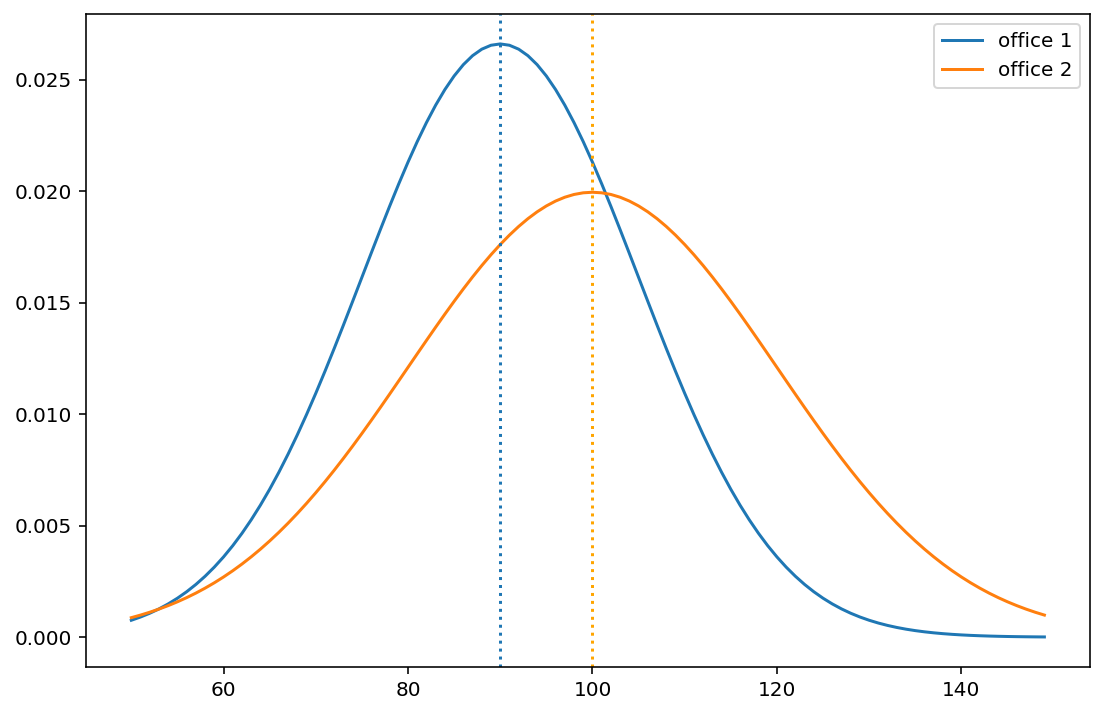

In [3]:
x = np.arange(50,150)

y1 = stats.norm(90,15).pdf(x)
y2 = stats.norm(100,20).pdf(x)

plt.figure(figsize=(9,6))
plt.plot(x, y1, label = 'office 1')
plt.plot(x, y2, label = 'office 2')
plt.axvline(90, ls = ':')
plt.axvline(100, ls = ':', color = 'orange')

plt.legend()

comparing average time (numeric continuous)

comparing two groups (discrete categories)

In [4]:
office_1 = stats.norm(90, 15).rvs(40)
office_2 = stats.norm(100, 20).rvs(50)

In [5]:
stat, p_val = stats.levene(office_1, office_2)

if p_val < 0.05:
    print('We can reject H0 ==> inequal variance')

In [6]:
α = 0.05

tstat, pval = stats.ttest_ind(office_1, office_2, equal_var=False)

In [7]:
tstat

-2.869590248445358

In [8]:
pval

0.005202803906715522

In [9]:
tstat, pval = stats.ttest_ind_from_stats(90,15,40,100,20,50, equal_var=False)

In [10]:
if pval < α:
    print('We can reject the null hypothesis')

We can reject the null hypothesis


## Q3

In [11]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/mpg'

In [12]:
mpg = data('mpg')

In [13]:
mpg['avg_fe'] = stats.hmean(mpg[['cty', 'hwy']], axis =1)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_fe
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [14]:
fe_2008 = mpg[mpg.year == 2008].avg_fe
fe_1999 = mpg[mpg.year == 1999].avg_fe

<AxesSubplot:>

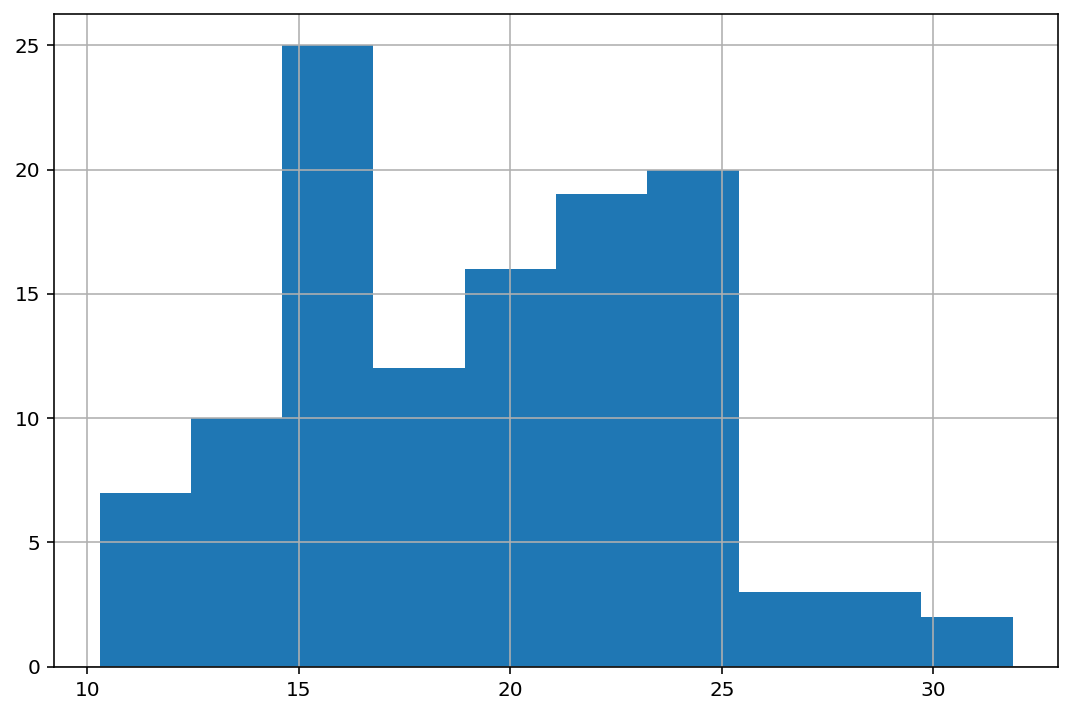

In [15]:
plt.figure(figsize=(9,6))
fe_2008.hist()

<AxesSubplot:>

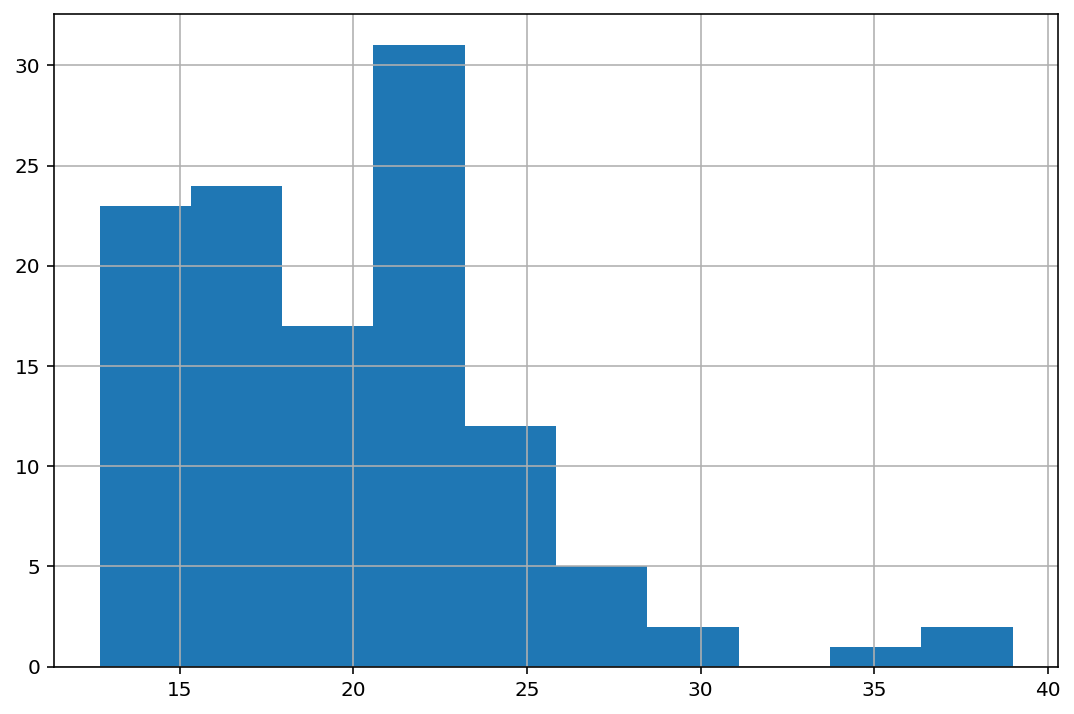

In [16]:
plt.figure(figsize=(9,6))
fe_1999.hist()

In [17]:
# observations per sample
fe_2008.count(), fe_1999.count()

(117, 117)

In [18]:
# check variance
fe_2008.var(), fe_1999.var()
#close enough

(22.550836772260343, 25.850396545865912)

In [19]:
#leven test to check equality of variance
t, p = stats.levene(fe_2008, fe_1999)
t, p

(0.031071867429515194, 0.8602339200830025)

In [20]:
# p is high so variance is equal

In [21]:
# tstat and pval
t, p = stats.ttest_ind(fe_2008, fe_1999)
t, p

(-0.3011962975077886, 0.7635345888327115)

In [22]:
if pval > α:
    print('We can reject null hypothesis')
else:
    print('We cannot reject null hypothesis')

We cannot reject null hypothesis


It is unlikely there is a significant difference in fuel-efficiency in cars from 2008 vs 1999

In [23]:
fe_2008.mean(), fe_1999.mean()

(19.488662986569054, 19.68238764869729)

Are compact cars more fuel-efficient than the average car?


In [24]:
fe_compact = mpg[mpg['class'] == 'compact'].avg_fe
μ = mpg.avg_fe.mean()

<AxesSubplot:>

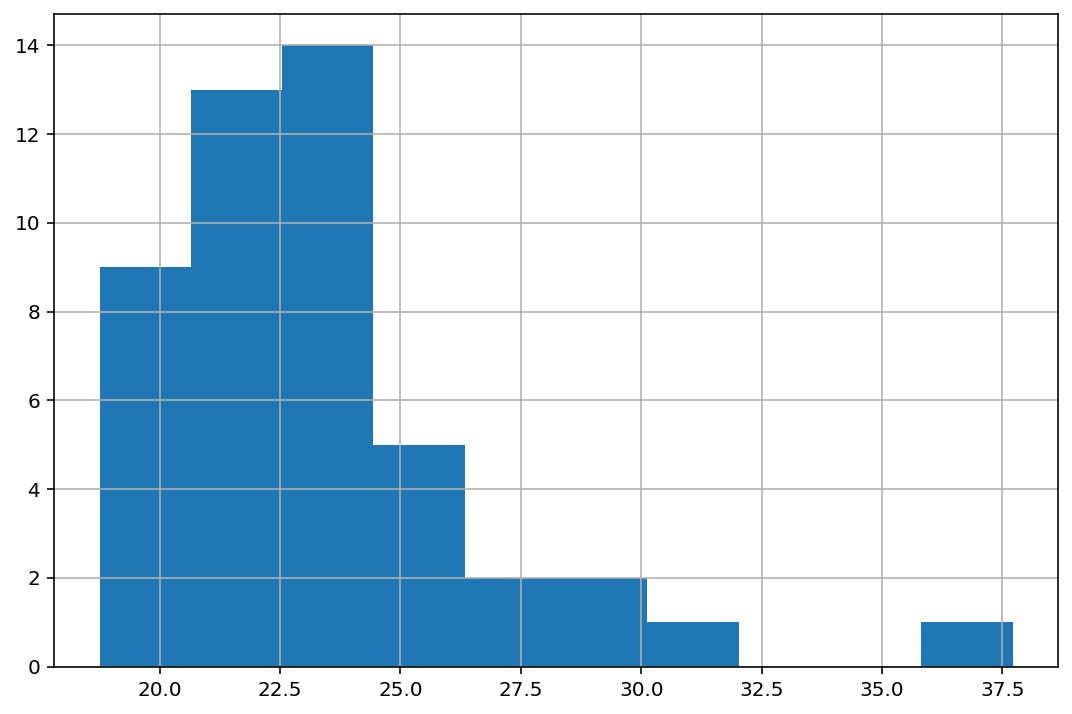

In [25]:
plt.figure(figsize=(9,6))
fe_compact.hist()

In [26]:
t, p = stats.ttest_1samp(fe_compact, μ)
t, p/2, alpha

(7.512360093161354, 7.808833174403837e-10, 0.05)

In [27]:
if p/2 < α and t>0:
    print('we can reject null hypothesis')
else:
    print('we cannot reject null hypothesis')

we can reject null hypothesis


Do manual cars get better gas mileage than automatic cars?

In [28]:
fe_auto = mpg[mpg.trans.str.contains('auto')].avg_fe
fe_manual = mpg[mpg.trans.str.contains('manual')].avg_fe

<AxesSubplot:>

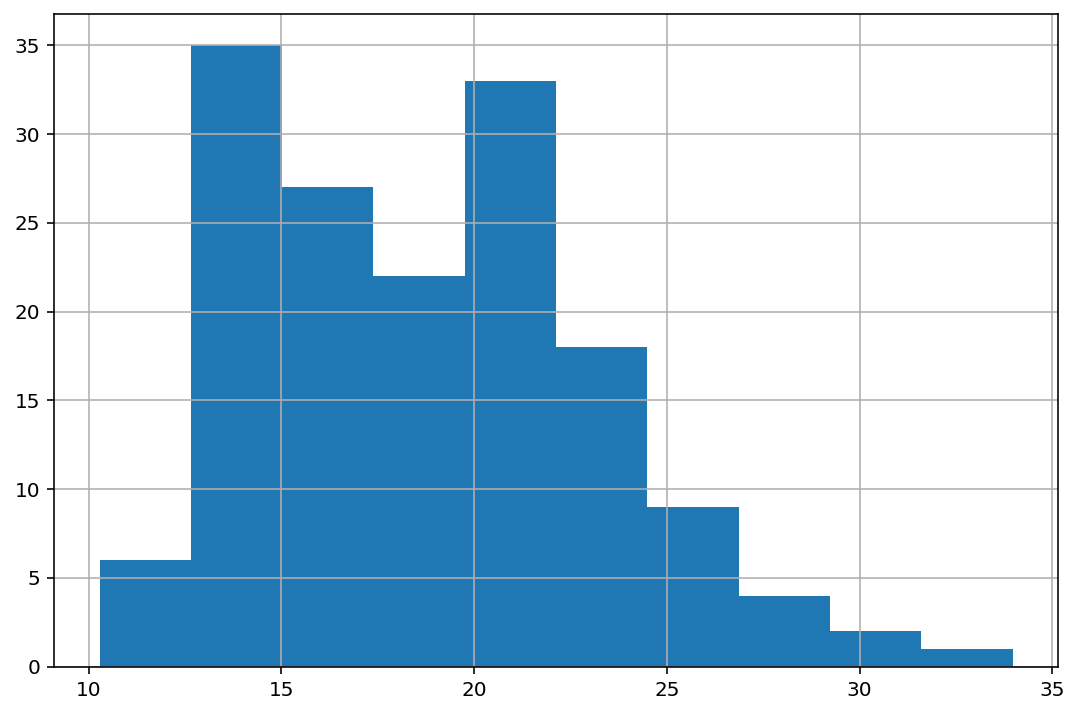

In [29]:
plt.figure(figsize=(9,6))
fe_auto.hist()

<AxesSubplot:>

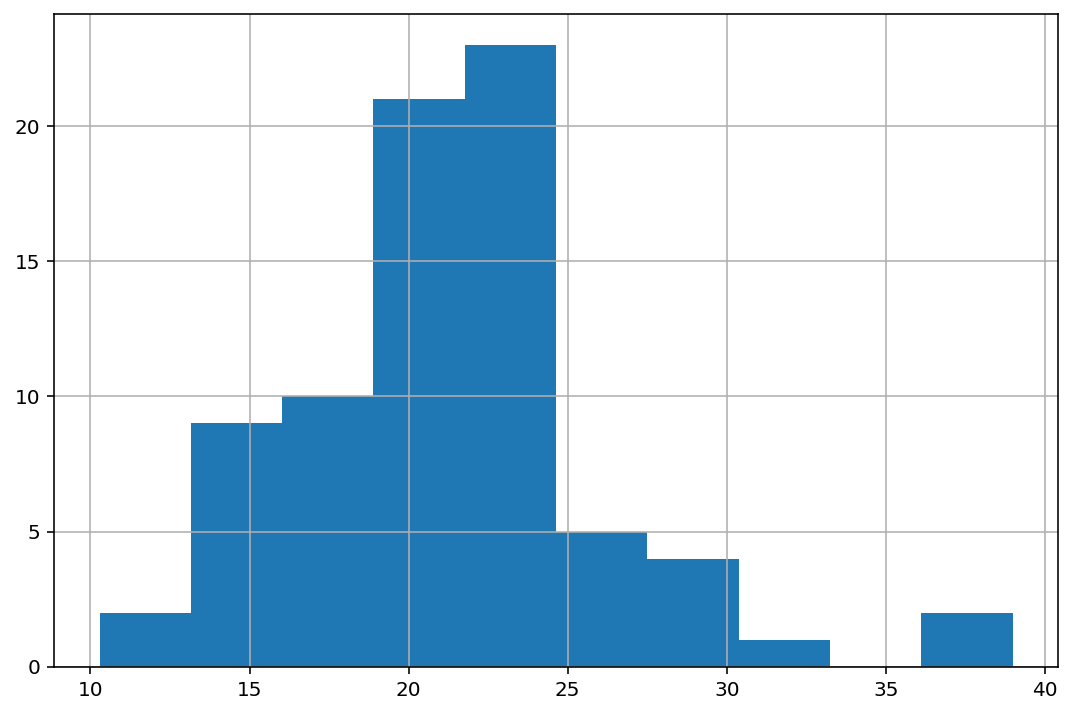

In [30]:
plt.figure(figsize=(9,6))
fe_manual.hist()

In [31]:
#check variance
fe_auto.var(), fe_manual.var()

(20.428279095002054, 25.665633639828275)

In [32]:
stats.levene(fe_auto, fe_manual)

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [33]:
#variance is equal
t, p = stats.ttest_ind(fe_manual, fe_auto, equal_var=True)
t, p/2, α

(4.652577547151351, 2.7552323050220043e-06, 0.05)

In [34]:
if p/2 and t>0:
    print('we reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

we reject the null hypothesis


In [35]:
mpg['transmission_type'] = np.where(mpg.trans.str.contains('auto'), 'Auto Transmission', 'Manual Transmission')

Text(0.5, 1.0, 'Is mileage different by transmission type?')

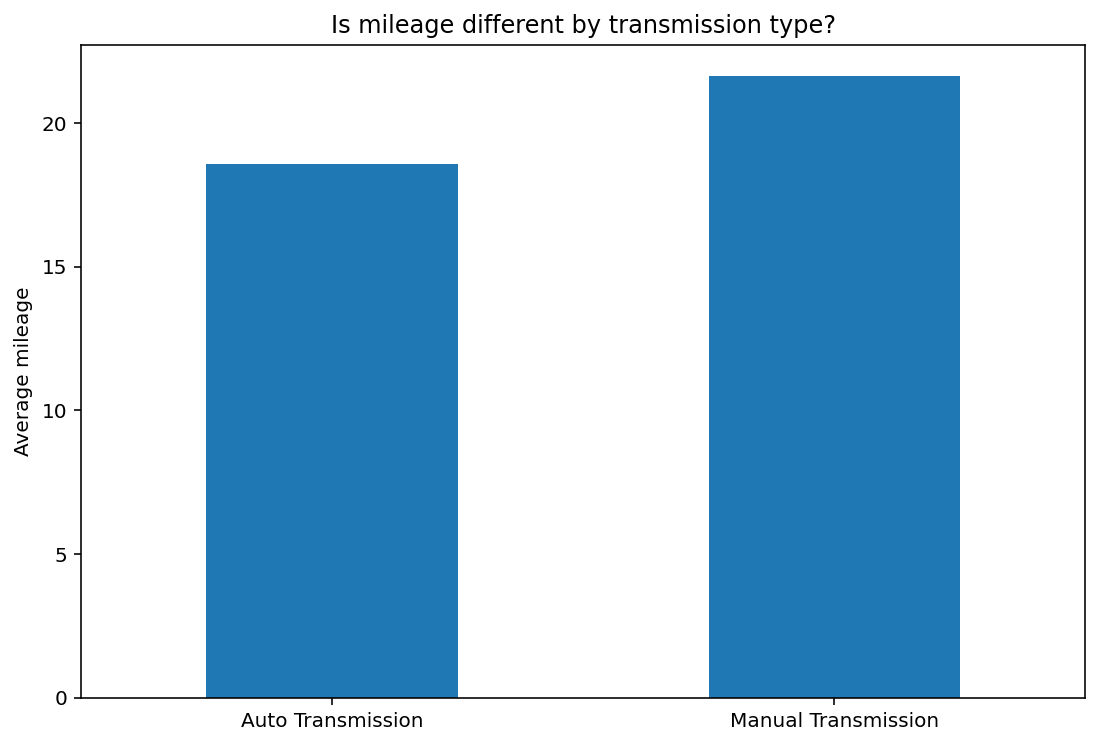

In [36]:
plt.figure(figsize=(9,6))
mpg.groupby('transmission_type').avg_fe.mean().plot.bar()
plt.xticks(rotation=0)
plt.xlabel('')
plt.ylabel('Average mileage')
plt.title('Is mileage different by transmission type?')

# Correlation Exercises

## Q1

Is there a relationship between the length of your arm and the length of your foot?

Discrete x Discrete: chi squared

Do guys and gals quit their jobs at the same rate?

discrete x continuous: t-test

Does the length of time of the lecture correlate with a students grade?

continuous x continuous: pearsons

## Q2

In [37]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/telco_churn'

In [56]:
t_churn = pd.read_sql('SELECT * FROM customers', url)
t_churn

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.60,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.90,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.90,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.00,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.90,267.4,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,Female,0,No,No,13,Yes,No,1,Yes,...,No,Yes,No,No,2,No,2,55.15,742.9,No
7039,9992-RRAMN,Male,0,Yes,No,22,Yes,Yes,2,No,...,No,No,No,Yes,1,Yes,1,85.10,1873.7,Yes
7040,9992-UJOEL,Male,0,No,No,2,Yes,No,1,No,...,No,No,No,No,1,Yes,2,50.30,92.75,No
7041,9993-LHIEB,Male,0,Yes,Yes,67,Yes,No,1,Yes,...,Yes,Yes,No,Yes,3,No,2,67.85,4627.65,No


In [40]:
#tenure vs monthly charges
r, p = stats.pearsonr(t_churn.tenure, t_churn.monthly_charges)
r, p

(0.24789985628615246, 4.094044991483017e-99)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

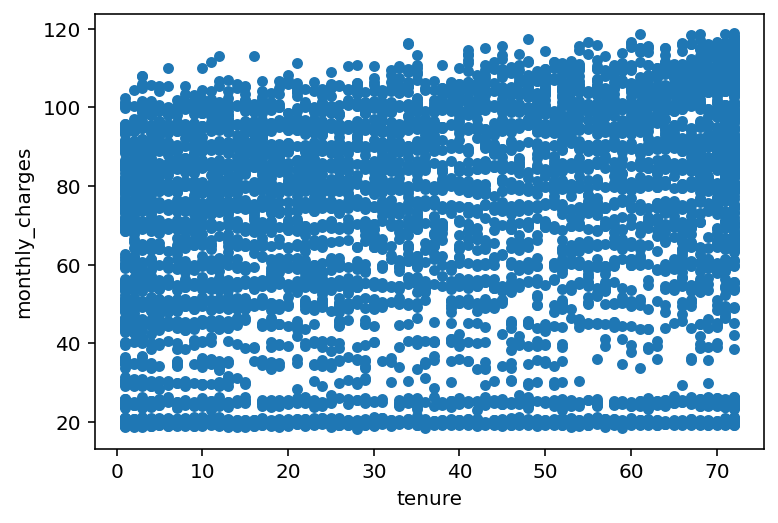

In [48]:
t_churn.plot.scatter(y='monthly_charges', x='tenure')

weak correlation

In [67]:
t_churn.total_charges = t_churn.total_charges.replace(' ', np.nan).astype(float)

In [68]:
t_churn.total_charges.dtype

dtype('float64')

In [69]:
t_churn = t_churn.dropna()
#t_churn.info()

In [70]:
# tenure vs total charges
stats.pearsonr(t_churn.tenure, t_churn.total_charges)

(0.8258804609332071, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

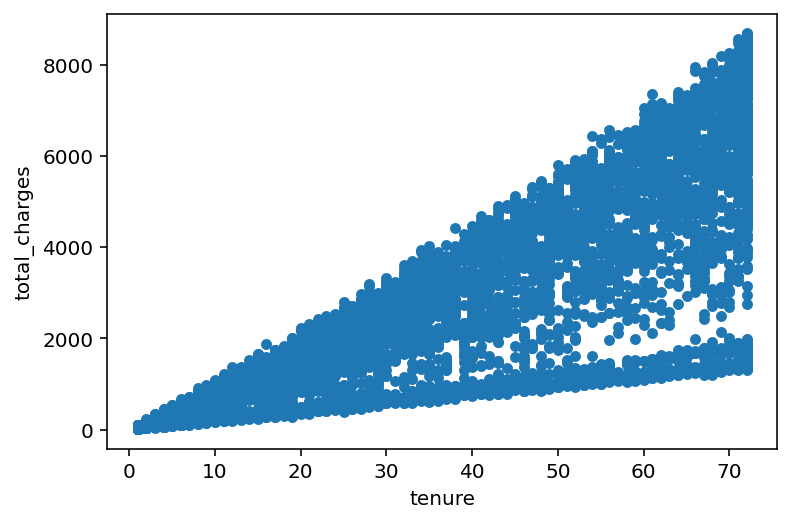

In [71]:
t_churn.plot.scatter(y='total_charges', x='tenure')

strong correlation

In [72]:
def corr_tenure_and_monthly(t_churn):
    # returns the results of a pearson's r corr test run on t_churn
    return pd.Series(stats.pearsonr(t_churn.tenure, t_churn.monthly_charges), index = ['r', 'p'])

In [73]:
t_churn.groupby(['internet_service_type_id', 'phone_service']).apply(corr_tenure_and_monthly)

r              p
internet_service_type_id phone_service                         
1                        No             0.592430   1.173274e-65
                         Yes            0.658094  5.781402e-216
2                        Yes            0.624621   0.000000e+00
3                        Yes            0.346188   4.896605e-44

In [74]:
t_churn.groupby(['phone_service']).apply(corr_tenure_and_monthly)

,r,p
phone_service,,
No,0.592430,1.173274e-65
Yes,0.244194,6.828016e-87


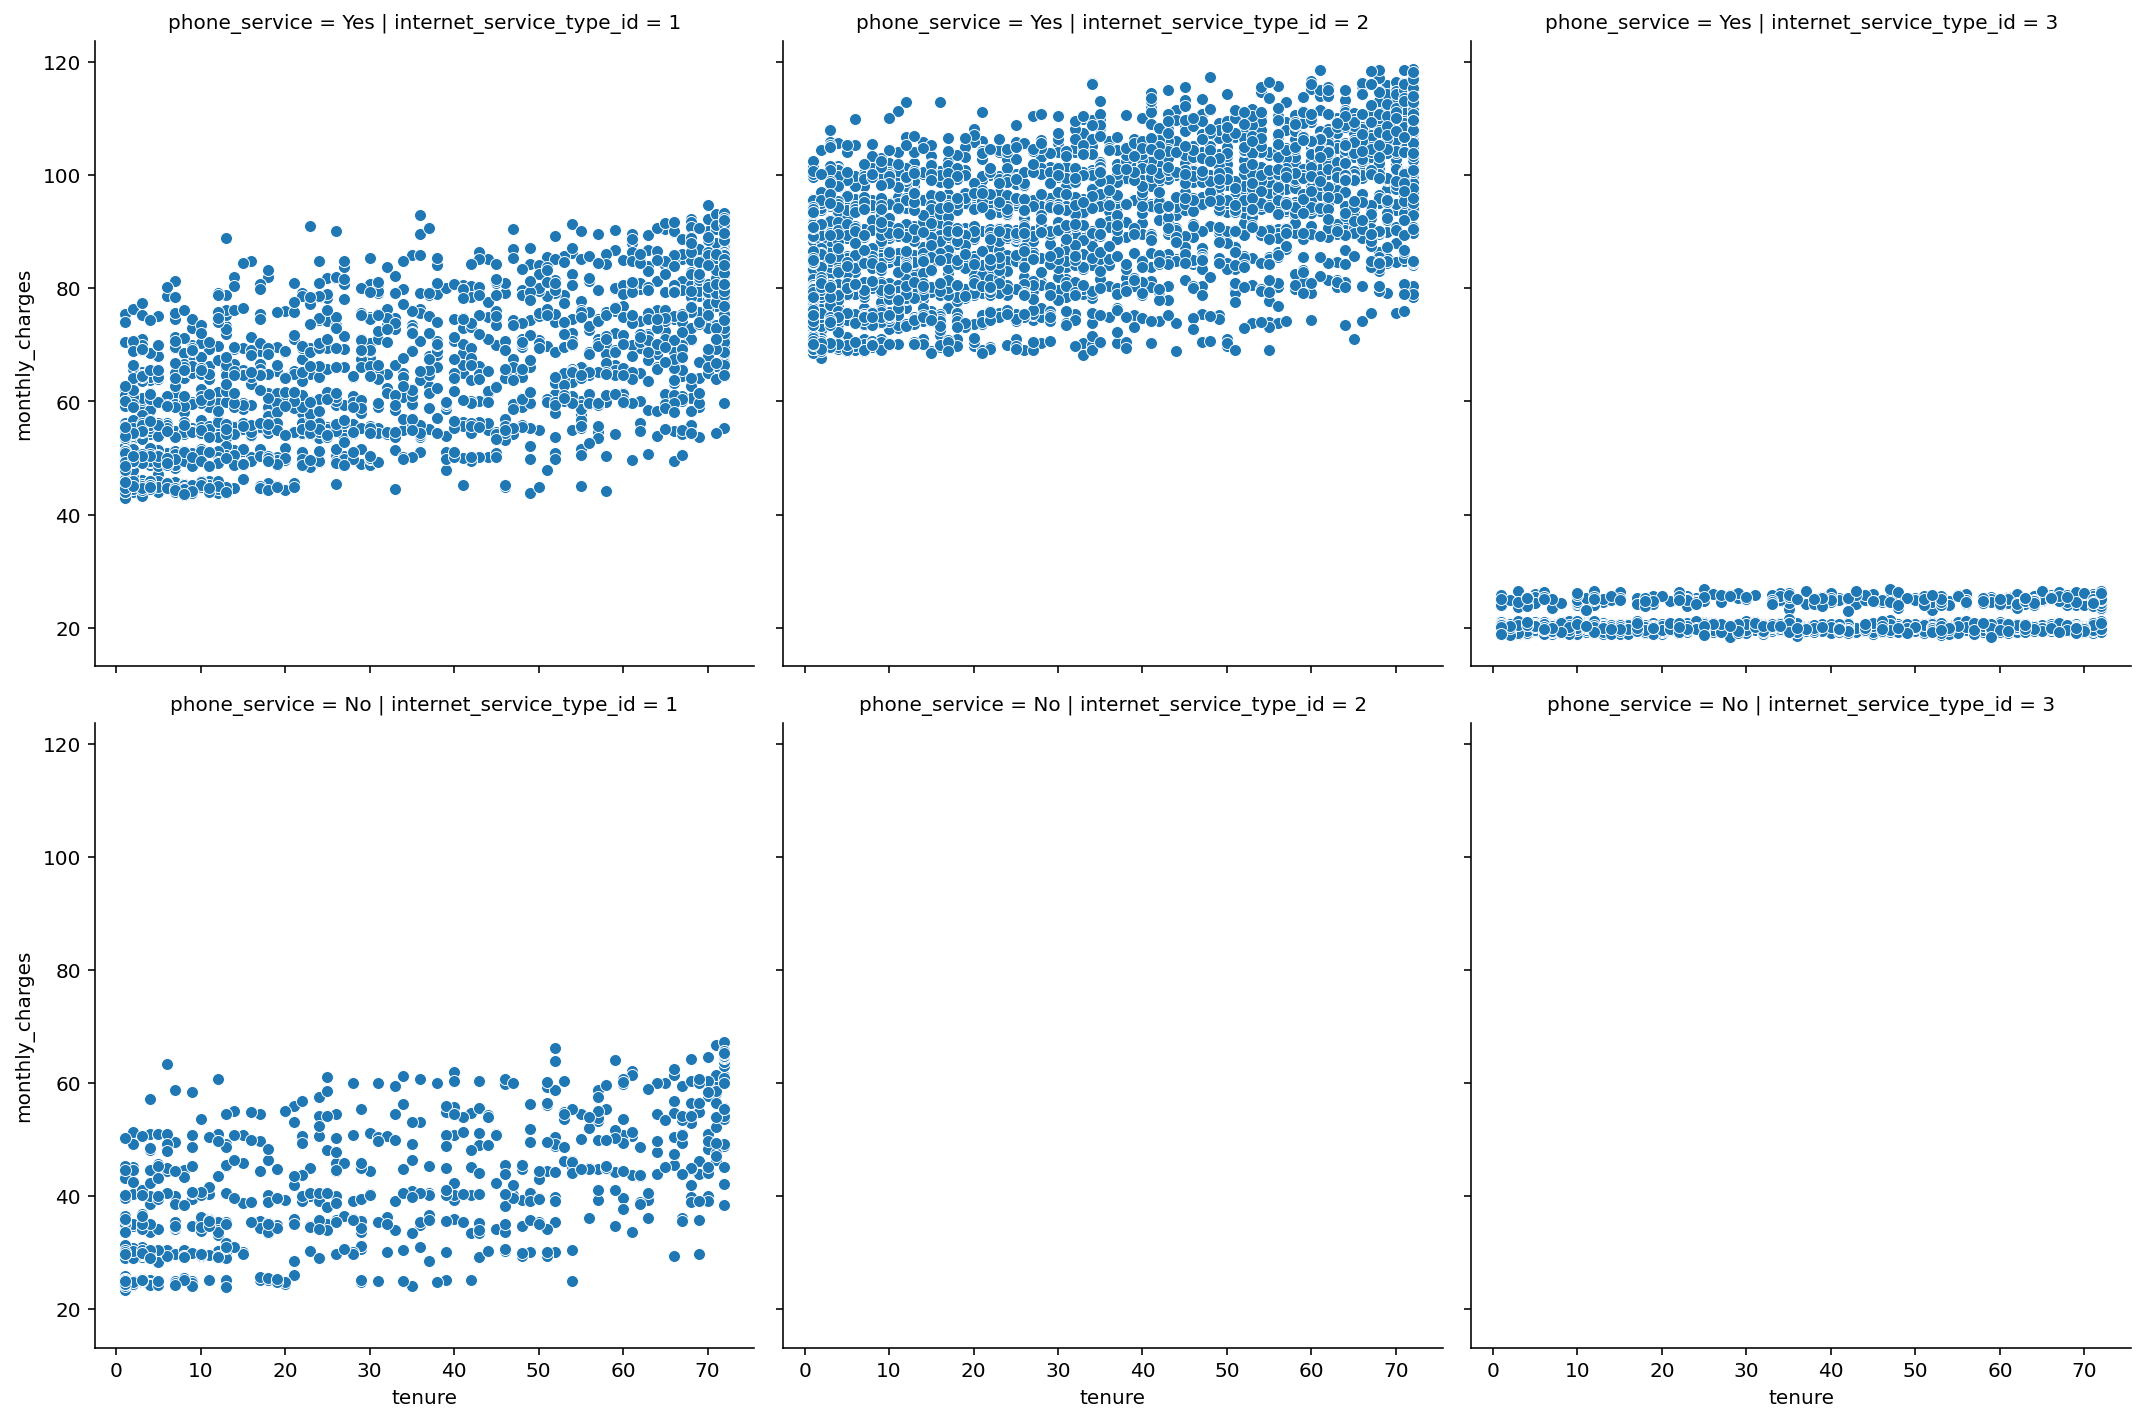

In [75]:
sns.relplot(data=t_churn, y='monthly_charges', x='tenure', col='internet_service_type_id', row='phone_service')

In [76]:
def corr_tenure_and_total(t_churn):
    return pd.Series(stats.pearsonr(t_churn.tenure, t_churn.total_charges), index=['r', 'p'])

In [78]:
t_churn.groupby(['internet_service_type_id', 'phone_service']).apply(corr_tenure_and_total)

r    p
internet_service_type_id phone_service               
1                        No             0.953423  0.0
                         Yes            0.970533  0.0
2                        Yes            0.985309  0.0
3                        Yes            0.981465  0.0

In [77]:
stats.pearsonr(t_churn.tenure, t_churn.total_charges)

(0.8258804609332071, 0.0)

## Q3

In [80]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [84]:
employees_with_salaries = pd.read_sql(
'''SELECT
DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
s.salary AS salary
FROM employees e
JOIN salaries s USING (emp_no)
WHERE s.to_date > NOW()''', url)

In [82]:
stats.pearsonr(employees_with_salaries.tenure, employees_with_salaries.salary)

(0.3064625613186014, 0.0)

weak correlation

In [85]:
employees_with_titles = pd.read_sql(
'''SELECT
    e.emp_no,
    DATEDIFF((SELECT MAX(hire_date) FROM employees), e.hire_date) AS tenure,
    n_titles
FROM employees e
JOIN (
    SELECT emp_no, COUNT(*) as n_titles
    FROM employees e
    JOIN titles t USING (emp_no)
    GROUP BY emp_no
) emp_title_count USING (emp_no)''', url)

In [86]:
stats.pearsonr(employees_with_titles.tenure, employees_with_titles.n_titles)

(0.2665989299134097, 0.0)

weak correlation

## Q4

In [90]:
import pydataset

In [94]:
sleep = pydataset.data('sleepstudy')

In [95]:
sleep.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [96]:
stats.pearsonr(sleep.Reaction, sleep.Days) # We reject the null hypothesis

(0.5352302262650255, 9.89409632221439e-15)

moderate correlation

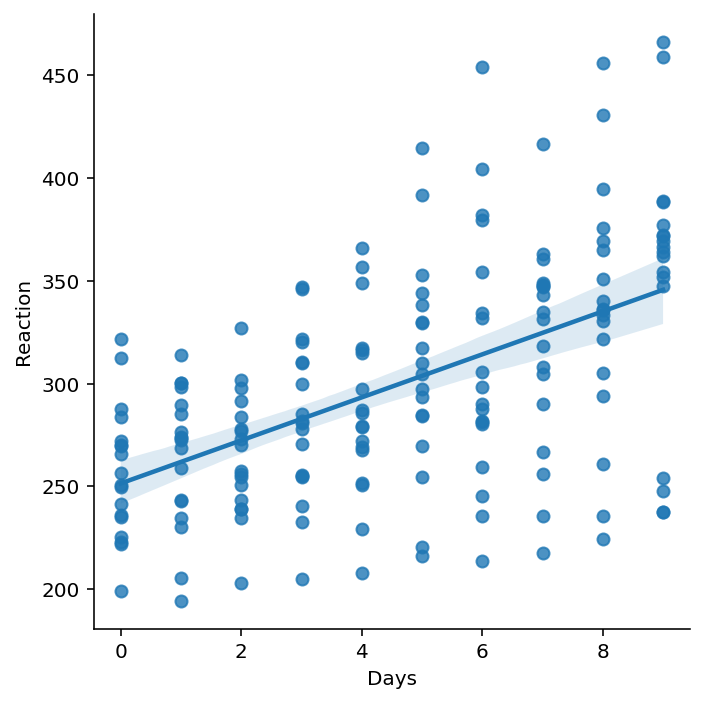

In [97]:
sns.lmplot(data=sleep, y='Reaction', x='Days')

# Chi2 Exercises

## Q1

## Q2

In [99]:
import pandas as pd
import numpy as np

from scipy import stats
α = 0.05

#### Hypothesis

H0: there is no association between being a codeup student and using a macbook

Ha: there is an association between being a codeup student and using a macbook

In [100]:
observed = [[49,20],[1,30]]
observed

[[49, 20], [1, 30]]

In [101]:
observed = pd.DataFrame(observed)
observed

,0,1
0,49,20
1,1,30


In [102]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [103]:
p

1.4116760526193828e-09

In [104]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject then null hypothesis')

We reject the null hypothesis


## Q3

In [105]:
from pydataset import data

In [106]:
df = data('mpg')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [108]:
df.nunique()

manufacturer    15
model           38
displ           35
year             2
cyl              4
trans           10
drv              3
cty             21
hwy             27
fl               5
class            7
dtype: int64

In [109]:
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [110]:
df.cyl.value_counts()

4    81
6    79
8    70
5     4
Name: cyl, dtype: int64

#### Hypothesis

H0: there is no association between the car year and cylinder

Ha: there is an association between the car year and cylinder

In [111]:
observed = pd.crosstab(df.year,df.cyl)

In [112]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [113]:
p

0.01702768537665195

In [114]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


## Q4

In [115]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/employees'

In [117]:
df = pd.read_sql(
'''select emp_no, gender, dept_name
    from employees
        join dept_emp
            using (emp_no)
        join departments
            using (dept_no)
        where to_date = '9999-01-01'
        and dept_name in ('Marketing','Sales')''', url)

#### Hypothesis

H0: there is no association between gender and the department

Ha: there is an association between gender and the department

In [123]:
df.gender.value_counts()

M    31680
F    20863
Name: gender, dtype: int64

In [124]:
df.dept_name.value_counts()

Sales        37701
Marketing    14842
Name: dept_name, dtype: int64

In [125]:
observed = pd.crosstab(df.gender, df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,5864,14999
M,8978,22702


In [126]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [127]:
if p < α:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


#### Hypothesis

H0: there is no association between gender and being a manager

Ha: there is an association between gender and being a manager

In [129]:
df = pd.read_sql(
'''select emp_no, gender, dept_no
        from employees
            left join dept_manager
                using (emp_no)''', url)

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300024 entries, 0 to 300023
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   emp_no   300024 non-null  int64 
 1   gender   300024 non-null  object
 2   dept_no  24 non-null      object
dtypes: int64(1), object(2)
memory usage: 6.9+ MB


In [131]:
df.dept_no.value_counts(dropna=False)

None    300000
d004         4
d006         4
d009         4
d001         2
d002         2
d003         2
d005         2
d007         2
d008         2
Name: dept_no, dtype: int64

In [132]:
df.dept_no = df.dept_no.fillna('not manager')

In [133]:
df.dept_no.value_counts()

not manager    300000
d004                4
d006                4
d009                4
d001                2
d002                2
d003                2
d005                2
d007                2
d008                2
Name: dept_no, dtype: int64

In [135]:
df.dept_no = np.where( df.dept_no != 'not manager', 'manager', 'not manager')

In [136]:
df.dept_no.value_counts()

not manager    300000
manager            24
Name: dept_no, dtype: int64

In [137]:
observed = pd.crosstab(df.gender, df.dept_no)
observed

dept_no,manager,not manager
gender,,
F,13,120038
M,11,179962


In [138]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [139]:
if p < α:
    print('We reject the null hypothesis')
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis
